In [1]:
from PIL import Image
import imagehash
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
fn = "./processor/static/templates/flex.png"
img = cv2.imread(fn)
edges = cv2.Canny(img,100,200)
c,_=cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for c1 in c:
    print(cv2.boundingRect(c1))

(291, 529, 118, 40)
(465, 489, 4, 1)
(530, 486, 2, 1)
(519, 486, 3, 1)
(472, 486, 2, 1)
(470, 486, 1, 2)
(465, 486, 3, 1)
(454, 486, 3, 1)
(231, 486, 2, 1)
(181, 486, 2, 1)
(478, 485, 1, 1)
(509, 484, 3, 2)
(502, 484, 3, 2)
(497, 484, 2, 1)
(468, 484, 1, 1)
(226, 484, 1, 1)
(223, 484, 1, 1)
(196, 484, 14, 3)
(203, 484, 1, 1)
(200, 484, 1, 1)
(184, 484, 11, 3)
(191, 484, 1, 1)
(188, 484, 1, 1)
(504, 483, 3, 4)
(498, 483, 3, 4)
(476, 483, 1, 3)
(539, 482, 4, 5)
(528, 482, 1, 3)
(490, 482, 1, 3)
(463, 482, 2, 6)
(208, 482, 1, 2)
(181, 482, 3, 3)
(519, 481, 3, 4)
(513, 481, 5, 5)
(505, 481, 1, 1)
(499, 481, 1, 1)
(466, 481, 2, 1)
(454, 481, 3, 4)
(452, 481, 1, 4)
(174, 481, 1, 3)
(221, 480, 12, 7)
(211, 480, 8, 7)
(208, 480, 2, 1)
(184, 480, 21, 4)
(182, 480, 1, 1)
(178, 480, 2, 2)
(530, 479, 1, 1)
(523, 479, 5, 8)
(519, 479, 3, 1)
(502, 479, 15, 4)
(497, 479, 4, 4)
(491, 479, 5, 8)
(471, 479, 4, 5)
(465, 479, 6, 6)
(458, 479, 5, 8)
(454, 479, 3, 1)
(543, 478, 1, 3)
(539, 478, 3, 3)
(537, 

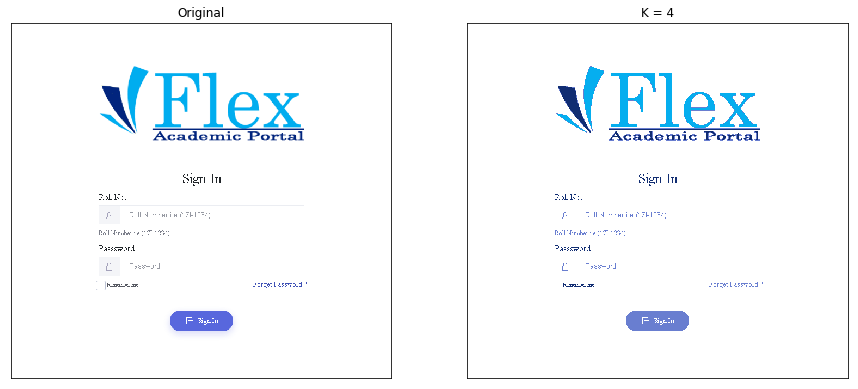

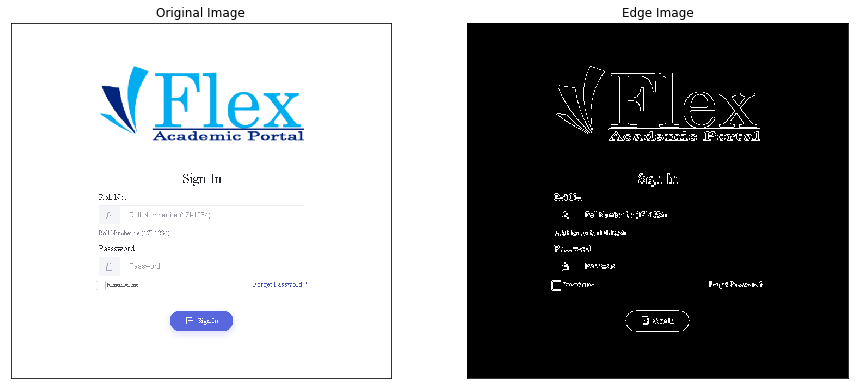

In [14]:
#Image segmentation from video using OpenCV and K-means clustering
import numpy as np
import cv2
import matplotlib.pyplot as plt
fn = "./processor/static/templates/flex.png"
original_image = cv2.imread(fn)
# Converting from BGR Colours Space to HSV
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)
vectorized = img.reshape((-1,3))
# convert to np.float32
vectorized = np.float32(vectorized)
# Here we are applying k-means clustering so that the pixels around a colour are consistent and gave same BGR/HSV values
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# We are going to cluster with k = 2, because the image will have just two colours ,a white background and the colour of the patch
K = 4
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
# Now convert back into uint8
#now we have to access the labels to regenerate the clustered image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
#res2 is the result of the frame which has undergone k-means clustering
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(res2)
plt.title('K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

#canny edge detection
edges = cv2.Canny(img,100,200)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(fn)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv.imshow("dd",markers)
cv.waitKey()

   


error: OpenCV(4.2.0) C:/projects/opencv-python/opencv/modules/highgui/src/precomp.hpp:137: error: (-215:Assertion failed) src_depth != CV_16F && src_depth != CV_32S in function 'convertToShow'


In [26]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        image=np.array(image)
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

16
35
images are not similar
32
images are not similar
36
images are not similar
34
images are not similar
36
images are not similar
37
images are not similar
37
images are not similar
33
images are not similar
35
images are not similar
32
images are not similar
35
images are not similar
47
images are not similar
39
images are not similar
32
images are not similar
30
images are not similar
35
images are not similar
31
images are not similar
1
images are similar


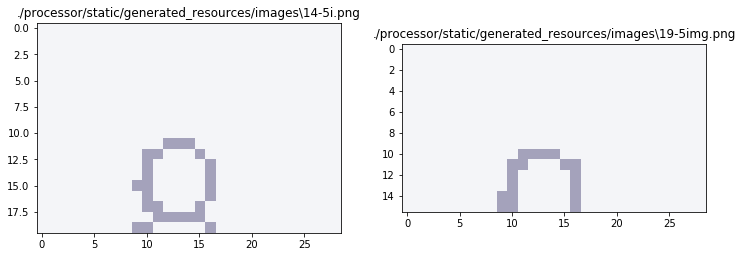

27
images are not similar
31
images are not similar
30
images are not similar
24
images are not similar
24
images are not similar
22
images are not similar
29
images are not similar
28
images are not similar
20
images are not similar
18
images are not similar
29
images are not similar
25
images are not similar
32
images are not similar
31
images are not similar
32
images are not similar
6
images are not similar
14
images are not similar
13
images are not similar
37
images are not similar
9
images are not similar
15
images are not similar
18
images are not similar
33
images are not similar
23
images are not similar
31
images are not similar
34
images are not similar
22
images are not similar
36
images are not similar
1
images are similar


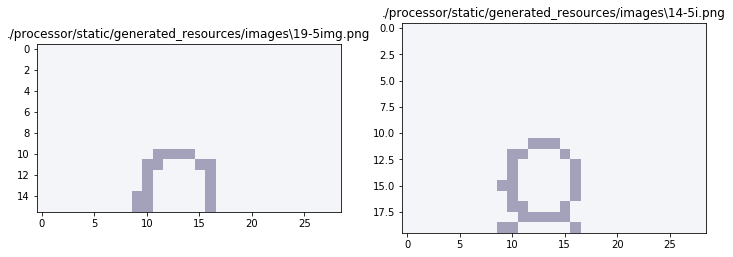

32
images are not similar
28
images are not similar
32
images are not similar
31
images are not similar
23
images are not similar
25
images are not similar
23
images are not similar
30
images are not similar
29
images are not similar
19
images are not similar
17
images are not similar
30
images are not similar
26
images are not similar
34
images are not similar
27
images are not similar
6
images are not similar
28
images are not similar
12
images are not similar
11
images are not similar
33
images are not similar
7
images are not similar
11
images are not similar
14
images are not similar
33
images are not similar
19
images are not similar
27
images are not similar
34
images are not similar
20
images are not similar
36
images are not similar
31
images are not similar
14
images are not similar
32
images are not similar
12
images are not similar
3
images are similar


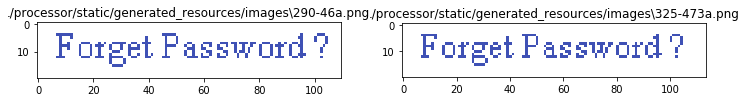

29
images are not similar
19
images are not similar
19
images are not similar
10
images are not similar
31
images are not similar
17
images are not similar
23
images are not similar
38
images are not similar
18
images are not similar
37
images are not similar
30
images are not similar
13
images are not similar
31
images are not similar
11
images are not similar
3
images are similar


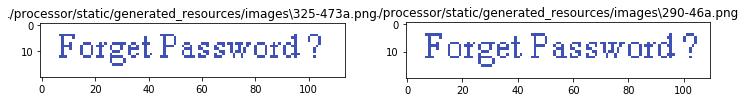

30
images are not similar
18
images are not similar
20
images are not similar
13
images are not similar
30
images are not similar
16
images are not similar
22
images are not similar
37
images are not similar
17
images are not similar
37
images are not similar
24
images are not similar
37
images are not similar
23
images are not similar
33
images are not similar
29
images are not similar
30
images are not similar
36
images are not similar
28
images are not similar
29
images are not similar
32
images are not similar
20
images are not similar
14
images are not similar
37
images are not similar
23
images are not similar
33
images are not similar
24
images are not similar
9
images are not similar
25
images are not similar
7
images are not similar
19
images are not similar
18
images are not similar
36
images are not similar
8
images are not similar
19
images are not similar
30
images are not similar
24
images are not similar
30
images are not similar
29
images are not similar
21
images are n

In [30]:
image_list = []
t=[]
for filename in glob.glob('./processor/static/generated_resources/images/*.png'):
    if filename.find('section')==-1:
        im=Image.open(filename)
        image_list.append(im)
        t.append(filename)
print(len(image_list))
for img1,t1 in zip(image_list,t):
    for img2,t2 in zip(image_list,t):
        if img1==img2:
            continue
        hash0 = imagehash.average_hash(img1) 
        hash1 = imagehash.average_hash(img2) 
        cutoff = 5
        print(hash0-hash1)
        if hash0 - hash1 < cutoff:
            print('images are similar')
            show_images([img1,img2],titles=[t1,t2])    
        else:
            print('images are not similar')
        
        